# Functions

Our ultimate goal in learning is to develop the ability to look at a mathematical expression and understand its characteristics and behavior purely from the equation.

An equation encodes a wealth of information about a function — such as its symmetry, intercepts, growth patterns, and key features like maxima, minima, and asymptotes — all of which can often be identified just by examining its form.


In [1]:
# Print last updated
import datetime
print(f"Quinn's Notebook last updated on: {datetime.datetime.now()}")

# Python version
!python --version

Quinn's Notebook last updated on: 2025-06-02 23:10:31.796205
Python 3.13.2


In [2]:
import numpy as np
import sympy as sym
import math
import matplotlib.pyplot as plt

### Introduction to Functions

A function is an expression or rule (or set of expressions) that maps a variable (or set of variables) onto another variable: 
$$f: x \rightarrow y$$

More precisely, we need the following data to describe a function:
* A set of inputs, called the **domain**;
* A set in which the outputs end up, called the **codomain**;
* A rule that tells us how to associate to each element of the domain precisely one element of the codomain. 

The set of all possible outputs is called the **range** of the function. The range is always contained in the codomain, but the codomain may be larger. 

Here, we're only interested in 
$x, f(x) \in \mathbb{R}.$


#### Vertical Line Test

$$y = f(x)$$
* $f$: The rule(s) that maps independent variables (`x`) onto dependent variables (`y`).
* $y$: A particular value of the output of a function for a particular value of `x`. 

If a vertical line passes through more than one point anywhere on the graph, then it's *not* a function because each value of the input (`x`) produces at most one value of the output (`y`).

#### Types of functions

* Polynomial
* Linear
* Power
* Rational
* Transcendental
* Exponential
* Logarithmic
* Reciprocal
* Piecewise
* Trigonometric
* Inverse
* Continuous
* Composite
* Algebraic

### Polynomial Functions

A function $f(x)$ is called a **polynomial function** if it can be written in the form:
$$f(x) = a_nx^n + a_{n-1}x^{n-1} + ... + a_1x + a_0 = \sum_{i=0}^{n} a_i x^i, \qquad a_n \neq 0$$
for some constants $a_0, a_1, \ldots, a_n$ and some non-negative integer $n$.

The number $n$, the highest occurring power of $x$, is called the **degree** of the polynomial function. It can be zero, in that case the function is simply constant. The constants $a_0, a_1, ..., a_n$ are called the **coefficients**. If you write a polynomial function in the form above, we say that it is in **standard form**.

Besides the standard form, there are other useful ways to write a polynomial function:
* **Factorized form** (or **factored form**): Write a polynomial function as a product of lower degree polynomial functions. For example: some degree 2 polynomial functions can be written as $f(x) = a(x - p)(x - q)$ for some constants $a, p,$ and $q$. This can be useful for finding zeros of a polynomial function. Unfortunately, it is not always possible. 
* **Vertex form**: Any degree 2 polynomial function can be written as $a(x - r)^2 + s$, for certain constants $a, r,$ and $s$. This form is also very convenient for finding the zeros of such a function.

#### Examples of polynomial functions
* $f(x) = 15$ (degree 0)
* $g(x) = -2x + 6$ (degree 1)
* $h(x) = \frac{1}{2}x^6 - 12x^3 + 8x^2$ (degree 6)

#### Implement the function

$$y = x^2 + 3x^3 - x^4$$

NumPy version:

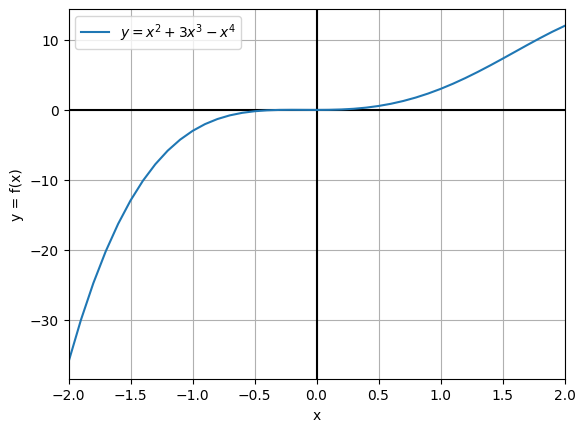

In [3]:
domain = [-2, 2]

# Option 1
resolution = 0.1
x = np.arange(domain[0], domain[1] + resolution, resolution)

# Option 2
x = np.linspace(domain[0], domain[1], 41)

# Define the polynomial function
y = x**2 + 3 * x**3 - x**4

# Plot the curve
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y, label='$y = x^2 + 3x^3 - x^4$')
plt.xlim(domain[0], domain[1])
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.legend()
plt.show()

SymPy version:

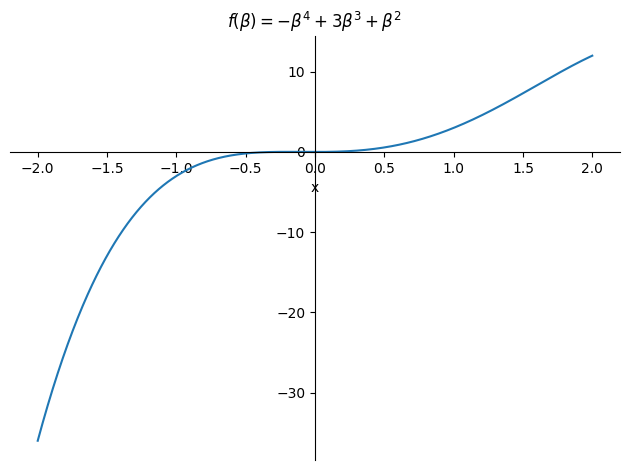

In [4]:
# Create a symbolic variable in sympy
s_beta = sym.var('beta')

# Define the polynomial function
s_y = s_beta**2 + 3*s_beta**3 - s_beta**4

# Plot the curve
sym.plot(s_y, (s_beta, domain[0], domain[1]), xlabel='x', ylabel=None, 
         title=f'$f(\\beta) = {sym.latex(s_y)}$')

In [5]:
fx = sym.lambdify(s_beta, s_y)

# Evaluate f(2) = -2^4 + 3 * 2^3 + 2^2
print(f'y = f(2) = {fx(2)}')

y = f(2) = 12


#### Visualizing Polynomials

The **highest degree term** (or the leading term) dominates a polynomial's behavior as $x \to \pm \infty$, regardless of the lower degree terms or the coefficients. This principle determines the behavior of the graph:
* **Even degree polynomials** (e.g., $x^2$, $x^4$):
    * Both ends of the graph point in the same direction.
    * If the leading coefficient is positive, both ends rise to $+\infty$. If negative, both fall to $-\infty$.
* **Odd degree polynomials** (e.g., $x^3$, $x^5$):
    * Ends point in opposite directions.
    * A positive leading coefficient means the right end rises to $+\infty$ and the left falls to $-\infty$. For negative coefficients, this reverses. 

For example, $y = −2x^3 + 5x$ behaves like $y=−2x^3$ at extreme $x$-values, with the left end rising and the right end falling.

Symmetry:
* **Even functions** (e.g., $y = x^2$) are symmetric about the $y$-axis.
* **Odd functions** (e.g., $y=x^3$) are symmetric about the origin.

Roots and Multiplicity:
* **Odd multiplicity roots** (e.g., $(x − 1)^1$) cause the graph to cross the $x$-axis.
* **Even multiplicity roots** (e.g., $(x + 2)^2$) cause the graph to touch and rebound off the $x$-axis.

The constant term (also the coefficient of $x^0$) is the **y-intercept** — the value of the polynomial when $x = 0$. For example:
* In $y = 3x^4 − 2x +7$, the y-intercept is 7, since substituting $x = 0$ gives $y = 7$.
* This point, $(0, c)$, is where the graph crosses the $y$-axis.

**Note:** While lower degree terms affect local behavior (e.g., oscillations, intercepts), the leading term dictates the global shape. This interplay allows polynomials to model complex phenomena in fields like physics and machine learning.

The code below allows us to generate random polynomial functions and observe how changes affect the graph's shape, curvature, and intercepts in real time:

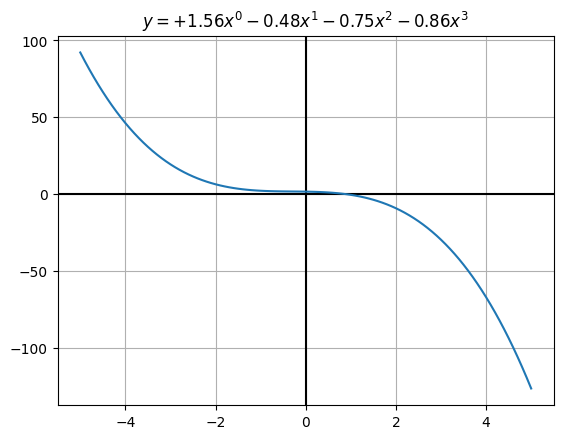

In [6]:
# Set the order of a polynomial
n = 3

# Generate random coefficients
coefs = np.random.randn(n + 1)

x = np.linspace(-5, 5, 101)
y = np.zeros(len(x))

fname = '$y = '
for i, c in enumerate(coefs):
    y += c * x**i
    fname += '+ '[int(c < 0)] + f'{c:.2f}x^{i}'

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y)
plt.title(fname + '$')
plt.show()

By actively manipulating polynomial equations and observing how their graphs respond, we're able to gain firsthand insight into concepts such as end behavior, roots and multiplicity, turning points, and the influence of coefficients. 

#### Applications of Polynomials

Polynomials are fundamental tools across mathematics, science, and engineering, with applications spanning a wide range of fields:
* **Algebra and Higher Mathematics** - Polynomials are key to solving equations, factoring, and constructing algebraic structures like polynomial rings, which are central concepts in advanced mathematics.
* **Calculus and Mathematical Analysis** - Polynomials are central to calculus, where they serve as foundational examples for differentiation and integration, and as building blocks for approximating more complex functions through Taylor and Maclaurin series.
* **Time Series Filtering and Signal Processing** - Polynomial functions are used in designing filters and smoothing algorithms for analyzing and processing time-dependent data, such as in economics, engineering, and meteorology.
* **Interpolation and Approximation** - Polynomial interpolation allows us to construct new data points within the range of a discrete set of known data points. Techniques like Lagrange and Newton interpolation rely on polynomials to estimate and approximate functions.
* **Physics and Kinematics** - Polynomials describe motion, such as computing position, velocity, and acceleration. For example, the equations for constant acceleration are polynomial in time.
* **Optimization** - Many optimization problems, especially in economics and engineering, involve maximizing or minimizing polynomial functions, often by finding their critical points and analyzing their behavior. 
* **Computer Graphics and Animation** - In computer graphics, polynomials are used to model curves and surfaces (e.g., Bézier curves, splines), which are essential for rendering shapes, animations, and video game environments. 
* **Economics and Finance** - Polynomial models are used to fit trends, forecast growth, and analyze economic data, such as in cost, revenue, and profit functions.
* **Other Applications**
    * Calculating area, perimeter, and volume of geometric figures.
    * Encoding information about objects, such as characteristic polynomials in linear algebra or chromatic polynomials in graph theory. 

Polynomials' versatility and computational simplicity make them indispensable in both theoretical and applied contexts.

### Linear Functions

$$y = mx + b \quad \text{(slope-intercept form)}$$


#### Linear vs. Nonlinear

Linear:
* Function can be simplified to $y = mx + b$
* Ratio of change in output to change in input is constant.
$$\frac{\Delta y}{\Delta x} = c$$

Nonlinear:
* Function cannot be simplified to $y = mx + b$
* Relationship between function input and output changes within the domain.
$$\frac{\Delta y}{\Delta x} \neq c$$

<br>

**Note:** A function is considered nonlinear specifically because a nonlinear operation is applied to the variable $x$ (i.e., raising it to a power other than one, taking its exponential, or applying a trigonometric function). It is not the mere presence of a nonlinear term or constant in the equation, but the way $x$ itself is transformed, that determines whether a function is nonlinear.

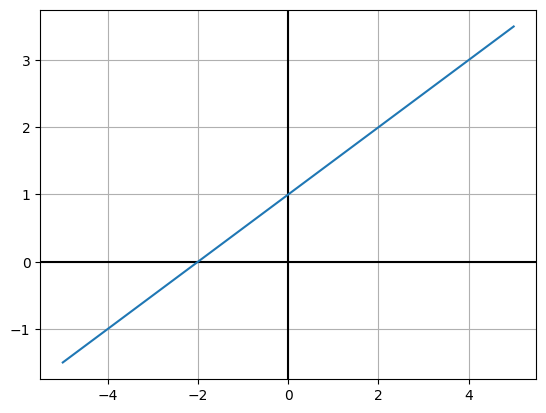

In [7]:
# Create a set of 100 points from -5 to 5
x = np.linspace(-5, 5, 100)

# Define the linear equation
y = 0.5 * x + 1

# Plot the straight line
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y)

This graph depicts the linear equation $y = 0.5x + 1$, showing a straight line with a slope of 0.5 that intersects the y-axis at (0, 1).

### Quadratic Functions

$$y = ax^{2} + bx + c$$


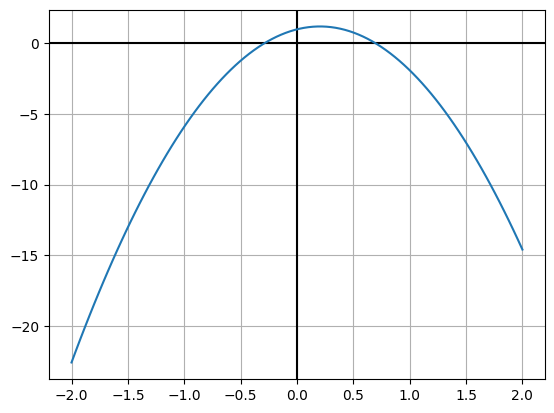

In [8]:
# Create a set of 100 points from -2 to 2
x = np.linspace(-2, 2, 100)

# Define the quadratic equation
y = -0.5 * 9.8 * x**2 + 2 * x + 1

# Plot the parabola
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y)

This graph illustrates the quadratic equation $y=-0.5\cdot 9.8x^{2}+2x+1$, which produces a downward-opening parabola modeling the height of an object under the influence of gravity.

### Rational Functions

A **rational function** is a function that can be written in the form
$$\frac{P(x)}{Q(x)} = \frac{\sum_{i=0}^{n} a_i x^i}{\sum_{i=0}^{k} b_i x^i},$$

where $P$ and $Q$ are polynomials, and $Q$ not identically equal to zero.

#### Examples of rational functions
* $f(x) = \frac{1}{x}$

* $g(x) = \frac{x + 3}{x^4 + 6x + 1}$

* $h(x) = \frac{5}{1}$ 

An **asymptote** of a function is a straight line which is approached by the graph of the function. A rational function $\frac{P(x)}{Q(x)}$ has **vertical asymptotes** only where the denominator $Q(x) = 0$. This is certainly true when the numerator $P(x) \neq 0$. 

A **horizontal asymptote** exists if degree($P$) $\leq$ degree($Q$) and can be calculated by dividing numerator and denominator by the highest power of $x$ occurring in the denominator and subsequently noting that $\frac{1}{x^n} \to 0$ as $x$ becomes very large. 


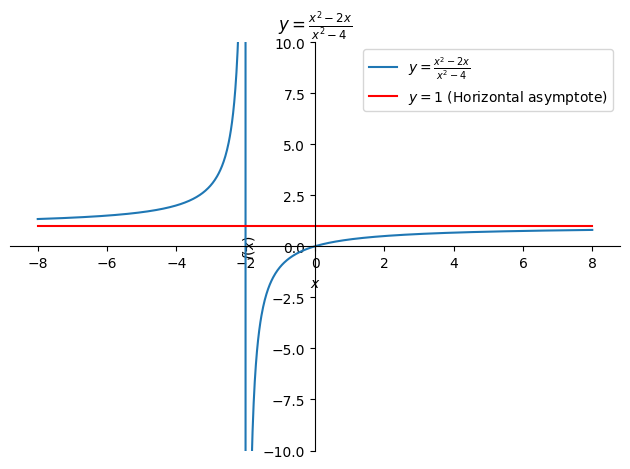

In [9]:
from sympy.abc import x

# Define the rational function
numerator = x**2 - 2*x
denominator = x**2 - 4
s_y = numerator / denominator

# Define the horizontal asymptote as a constant function y=1
asymptote = sym.Lambda(x, 1)

# Plot the function and the asymptote
p = sym.plot(s_y, asymptote(x), (x, -8, 8), ylim=[-10, 10], 
             legend=True, 
             title=f'$y = {sym.latex(s_y)}$',
             show=False)

p[0].label = f'$y = {sym.latex(s_y)}$'
p[1].line_color = 'red'         
p[1].label = '$y=1$ (Horizontal asymptote)'

p.show()

The graph of the rational function $y = \frac{x^2 - 2x}{x^2 - 4}$ provides critical insights into its structure and behavior. 

By factoring the numerator and denominator, we obtain $y = \frac{x(x - 2)}{(x - 2)(x + 2)}.$

A hole occurs at $x = 2$ where both numerator and denominator are zero, creating a removable discontinuity.

For all $x \neq 2$, the expression simplifies to $y = \frac{x}{x + 2}.$

The function is undefined at $x = −2$ because the denominator equals zero while the numerator remains non-zero, producing a vertical asymptote as seen in the graph above. Furthermore, as $x$ approaches $-2$ from the left, $y \to +\infty$, whereas as $x$ approaches $−2$ from the right, $y \to -\infty$.

Since the numerator and denominator have the same degree, the function also has a horizontal asymptote at $y = 1$, which is the ratio of their leading coefficients. This means that as $x$ approaches $\pm \infty$, the value of $y \to 1$.

### Transcendental Functions

Transcendental functions are functions that cannot be expressed as a finite combination of algebraic operations (like addition, multiplication, roots, or solving polynomial equations).

In simpler terms:
- **Algebraic functions** are built from polynomials, roots, and rational functions.
- **Transcendental functions** go beyond that — they're not solutions of any polynomial equation with finite degree and coefficients.

#### Examples of transcendental functions
* **Exponential functions**: $e^x$
* **Logarithmic functions**: $ln⁡(x)$
* **Trigonometric functions**: $sin⁡(x)$, $cos⁡(x)$, $tan⁡(x)$
* **Inverse trigonometric functions**: $arcsin⁡(x)$, $arccos⁡(x)$
* **Hyperbolic functions**: $sinh⁡(x)$, $cosh⁡(x)$, $tanh⁡(x)$

### Exponential Functions

A function $f(x)$ is an **exponential function** if it can be written as $f(x) = Ab^x$, where $A \neq 0$ and $b \gt 0$. The number $b$ is called the **base** of the exponential function. 

When working with exponential functions, the following properties are often very useful. They follow directly from the rules of calculation for power functions. 

#### Rules of calculation
* $b^{x + y} = b^xb^y$
* $b^{x - y} = \frac{b^x}{b^y}$
* $(b^x)^y = b^{xy}$
* $b^xc^x = (bc)^x$

We assume here that $b, c > 0$, and $x$ and $y$ can be any real number.

#### Natural Exponent

$$y = e^{x}$$

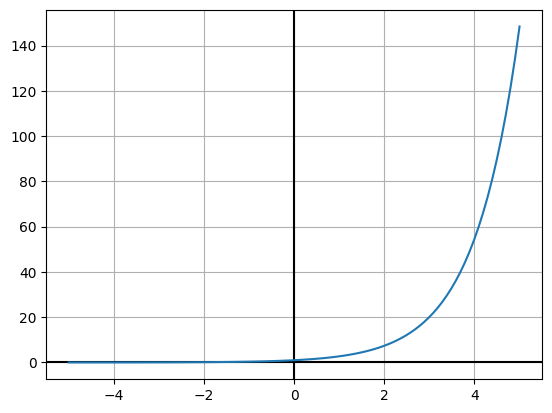

In [10]:
# Create a set of 100 points from -5 to 5
x = np.linspace(-5, 5, 100)

# Define the exponential function
y = np.exp(x)

# Plot the exponential graph
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y)

The graph of the exponential function $y=e^{x}$ rises increasingly steeply as $x \to +\infty$, illustrating exponential growth. 
As $x$ increases, $y \to \infty$; as $x$ decreases, $y \to 0$ but never actually reaches zero. The function $y=e^{x}$ is always positive for all real values of $x$. 

#### Origin of $e$

The mathematical constant $e \approx 2.71828$ arises naturally in contexts involving continuous growth, calculus, and mathematical modeling. One of its foundational definitions is given by the limit:

$$e = \lim_{n \to \infty} \left(1 + \frac{1}{n}\right)^n$$


In [11]:
print(f'e ≈ {np.exp(1)}')

e ≈ 2.718281828459045


Let's estimate $e$ using the limit formula $\left(1 + \frac{1}{n}\right)^n$ with increasing $n$:

In [12]:
nums = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

for n in nums:
    # Estimate e using the limit definition
    e = (1 + (1/n))**n
    print(f'n: {n:4.0f}, est.e: {e:.5f}, diff to e: {np.exp(1) - e:.5f}')

n:    1, est.e: 2.00000, diff to e: 0.71828
n:    2, est.e: 2.25000, diff to e: 0.46828
n:    4, est.e: 2.44141, diff to e: 0.27688
n:    8, est.e: 2.56578, diff to e: 0.15250
n:   16, est.e: 2.63793, diff to e: 0.08035
n:   32, est.e: 2.67699, diff to e: 0.04129
n:   64, est.e: 2.69734, diff to e: 0.02094
n:  128, est.e: 2.70774, diff to e: 0.01054
n:  256, est.e: 2.71299, diff to e: 0.00529
n:  512, est.e: 2.71563, diff to e: 0.00265
n: 1024, est.e: 2.71696, diff to e: 0.00133


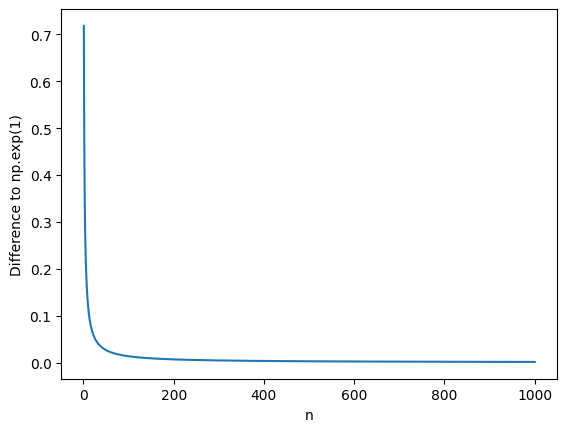

In [13]:
n = np.arange(1, 1001)

# Calculate the difference in value for e
e_diffs = np.exp(1) - (1 + 1/n)**n

# Plot the difference
plt.plot(n, e_diffs)
plt.xlabel('n')
plt.ylabel('Difference to np.exp(1)')
plt.show()

### Exponential vs. Quadratic

Here, we're interested in growth rates — a concept central to fields such as calculus, computer science, and machine learning.

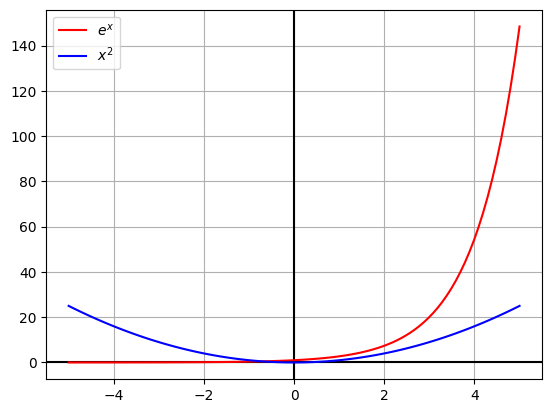

In [14]:
# Create a set of 100 points from -5 to 5
x = np.linspace(-5, 5, 100)

# Define the exponential function
y = np.exp(x)

# Define the quadratic equation
y2 = x**2

# Plot the graph comparison
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y, label='$e^{x}$', color='r')
plt.plot(x, y2, label='$x^{2}$', color='b')
plt.legend()

When comparing the quadratic equation $y = x^{2}$ to the exponential function $y = e^{x}$, we see that while the quadratic initially grows quickly, the exponential function eventually surpasses it and increases much more rapidly as $x$ becomes large.

### Logarithmic Functions

Let $b \gt 1$. The **logarithm** in base $b$ is defined as the inverse function of the exponential function $b^x$.

#### Definition of the logarithm

Let $y \in \mathbb{R}$ and $x \in (0, \infty)$, then
$$y = \log_b(x) \qquad \Leftrightarrow \qquad x = b^y.$$

#### Rules of calculation

$1. \quad \log_b(AB) = \log_b(A) + \log_b(B)$

$2. \quad \log_b(\frac{A}{B}) = \log_b(A) - \log_b(B)$

$3. \quad \log_b(A^K) = K\log_b(A)$

$4. \quad \log_b(A) = \frac{\log_c(A)}{\log_c(b)} = \frac{\ln(A)}{\ln(b)} \qquad \text{(change of base formula)}$

We assume here that $A, B \gt 0$ and $b, c \gt 1$. The number $K$ can be any real number.

#### Natural Logarithm

$$y = \ln x$$ 

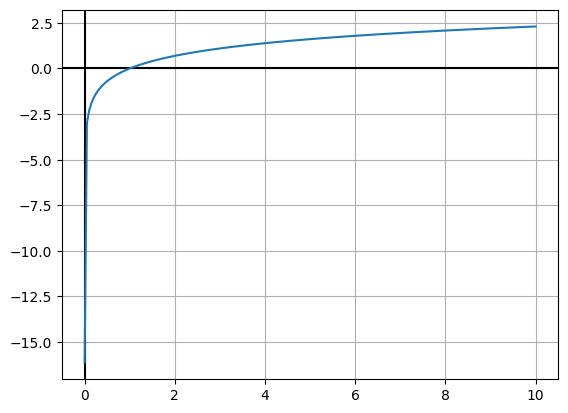

In [15]:
# Create a set of 200 points from 0.0000001 to 10
x = np.linspace(0.0000001, 10, 200)

# Define the logarithmic function
y = np.log(x) # ln(x)

# Plot the logarithmic graph
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y)

The logarithmic function $y = \ln x$ cannot accept zero as an input because as $x \to 0^+$, $\ln x \to -\infty$ — a value that cannot be represented or plotted on a computer. To visualize this behavior, we use values very close to zero, such as $0.0000001$.

In the graph above, the curve plunges steeply downward toward $-\infty$ as it approaches the y-axis and increases slowly toward $+\infty$ as $x \to \infty$. The function is undefined for all real values of $x \leq 0$.

### Logarithmic vs. Exponential

Logarithmic functions and exponential functions are inverses of one another, meaning they "undo" each other's operations when applied within their respective domains. Specifically, the natural logarithm ($\ln x$) and the natural exponential ($e^x$) satisfy the following inverse relationships:

$$\ln(e^x) = x, \quad \forall x \in \mathbb{R}$$

$$e^{\ln(x)} = x, \quad \forall x \gt 0$$

This inverse relationship is fundamental in mathematics and is reflected in their graphs, which are mirror images across the line $y = x$.

### Trigonometric Functions

When working with the trigonometric functions $\sin (x)$, $\cos (x)$, and $\tan (x)$, it is often useful to simplify them using (one of the many) identities for these functions. Two fundamental identities are:
$$\sin^2(x) + \cos^2(x) = 1$$
which follows from the Pythagorean Theorem, and
$$\tan x = \frac{\sin x}{\cos x}$$
which is the definition of the tangent function.

For several identities, especially for $\sin(x)$ and $\cos(x)$, one should just keep the graphs in mind to remember them. 

#### Sine

$$y = \sin x$$

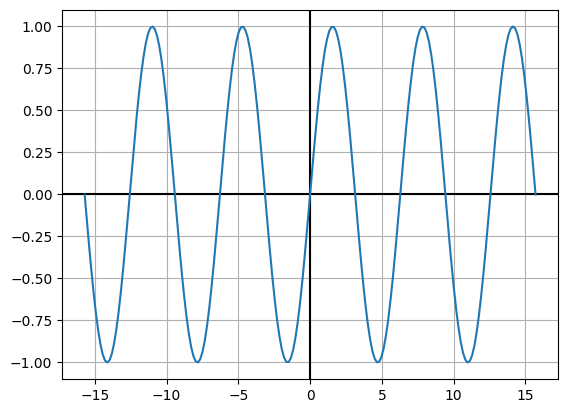

In [16]:
x = np.linspace(-5 * np.pi, 5 * np.pi, 200)

# Define the trigonometric function
y = np.sin(x)

# Plot the sine wave
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y, color='C0')

The periodic nature of $y = \sin x$ means that the function repeats its values at regular intervals, specifically every $2 \pi$ units along the x-axis. This property is called the function's periodicity: $\forall x$, $\sin⁡(x+2\pi)= \sin⁡(x)$. As a result, the graph forms a continuous wave pattern that extends infinitely in both directions, with each cycle mirroring the previous one. 

This endless repetition creates the distinctive infinite wave pattern seen in the above sine function's graph.

#### Approximating a sine wave using polynomial expansions from the Maclaurin series

$$\sin(x) = \sum_{n=0}^{\infty} (-1)^{n} \frac{x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

The **Maclaurin series** is a special case of a Taylor series centered at 0, and it represents a function as an infinite sum of polynomial terms based on the function's derivatives at 0.


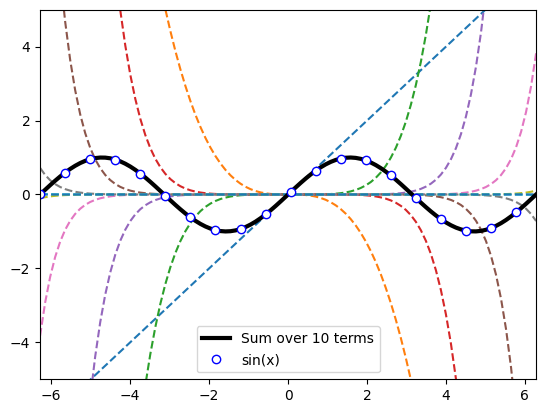

In [17]:
order = 10

x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
z = np.zeros(len(x))

for n in range(order + 1):
    # Create the term
    sign = (-1)**(n)
    numerator = x**(2*n + 1)
    denominator = math.factorial(2*n + 1)
    term = sign * numerator/denominator

    # Plot the term
    plt.plot(x, term, '--')

    # Sum the term onto z
    z += term

# Plot the Maclaurin series
plt.plot(x, z, 'k', linewidth=3, label=f'Sum over {order} terms')

# Plot the sine wave (with some points of x skipped)
plt.plot(x[::5], np.sin(x[::5]), 'bo', markerfacecolor='w', linewidth=3, label='sin(x)')

plt.ylim([-5, 5])
plt.xlim(x[[0, -1]])
plt.legend()
plt.show()

#### Cosine

$$y = \cos x$$

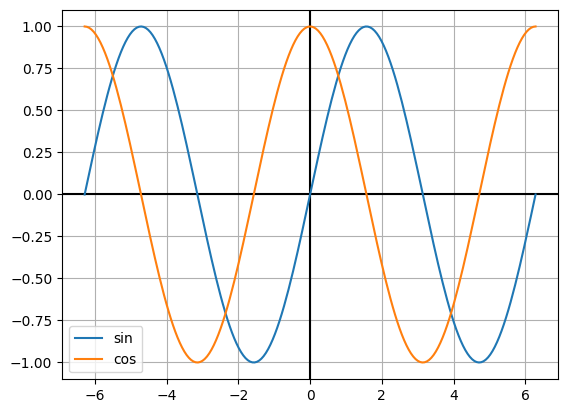

In [18]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 200)

# Define the trigonometric function
y = np.sin(x)
y2 = np.cos(x)

# Plot the cosine wave
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y, label='sin');
plt.plot(x, y2, label='cos');
plt.legend();

The graph of $y = \cos x$ can be viewed as a horizontally shifted version of the sine function $y = \sin x$. Specifically, the cosine wave is the sine wave shifted to the left by $\frac{\pi}{2}$ units.

#### Tangent

$$y = \tan x = \frac{\sin x}{\cos x}$$

Recall,
* $\sin \theta = \frac{o}{h}$

* $\cos \theta = \frac{a}{h}$

* $\tan \theta = \frac{o}{a} = \frac{\sin \theta}{\cos \theta} = \frac{\frac{o}{h}}{\frac{a}{h}} = \frac{o}{a}$

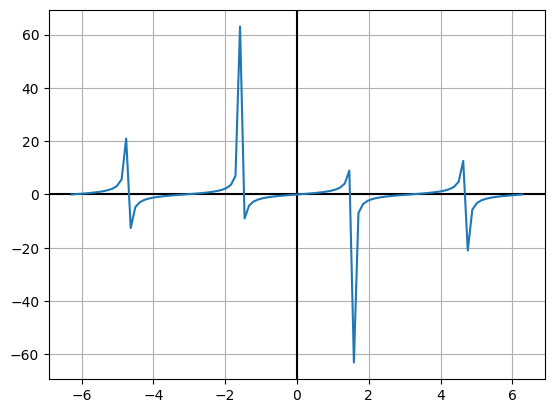

In [19]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

# Define the trigonometric function
y = np.tan(x)

# Plot the tangent curve
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

The graph above for the function $y = \tan x$ may not resemble the typical tangent curve we’re familiar with. This discrepancy arises from limitations in how the plot is generated. When plotting, we provide a series of data points, and the plotting tool automatically connects each point to the previous one. However, this connection isn’t always appropriate — especially for functions like tangent.

The tangent function has vertical asymptotes at values such as $x = \frac{\pi}{2}$, where the function approaches $\infty$ on one side and $-\infty$ on the other. As $x$ gets closer to these asymptotes, the function's values increase or decrease without bound. In reality, the graph should break at these points rather than connect across them. The plot above doesn't reflect this behavior, which is why it doesn't accurately represent the true shape of the tangent function.

#### Periodicity

For any integer $k$,
* $\sin(x) = \sin(x + 2k\pi)$
* $\cos(x) = \cos(x + 2k\pi)$
* $\tan(x) = \tan(x + k\pi)$

**Note:** The sine and cosine have period $2\pi$, but the tangent has period $\pi$. 

#### Reflections and translations

* $\sin(-x) = -\sin(x)$
* $\cos(-x) = cos(x)$
* $\sin(\frac{\pi}{2} - x) = \cos(x)$
* $\cos(\frac{\pi}{2} - x) = \sin(x)$
* $\sin(\pi - x) = \sin(x)$
* $\cos(\pi - x) = -\cos(x)$

The following identities are also very useful for simplifying the expressions involving sines and cosines.

#### Double angle formulas

* $\sin(2x) = 2\sin(x)\cos(x)$
* $\cos(2x) = \cos^2(x) - \sin^2(x) = 2\cos^2(x) - 1 = 1 - 2\sin^2(x)$

#### Addition formulas
* $\sin(x + y) = \cos(x)\sin(y) + \sin(x)\cos(y)$
* $\cos(x + y) = \cos(x)\cos(y) - \sin(x)\sin(y)$

**Note:** The double angle formulas are actually special cases of the addition formulas,
$$\sin(2x) = \sin(x + x) = \cos(x)\sin(x) + \sin(x)\cos(x) = 2\sin(x)\cos(x),$$
and
$$\cos(2x) = \cos(x + x) = \cos(x)\cos(x) - \sin(x)\sin(x) = \cos^2(x) - \sin^2(x).$$

The other two formulas for $\cos(2x)$ can be obtained by using $\sin^2(x) + \cos^2(x) = 1.$

### Hyperbolic Functions

#### Hyperbolic Sine

$$y = \sinh (x) = \frac{e^x - e^{-x}}{2} \text{ (expressed in terms of exponential functions)}$$

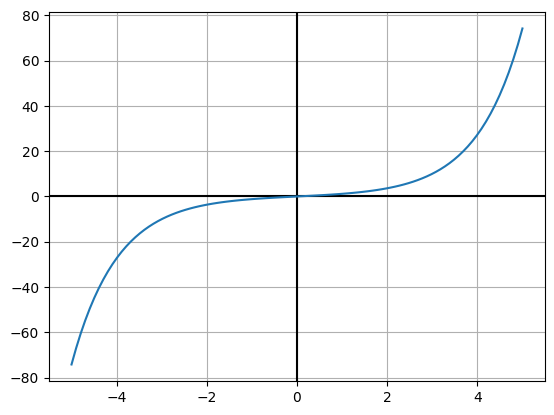

In [20]:
# Create a set of 100 points from -5 to 5
x = np.linspace(-5, 5, 100)

# Define the hyperbolic function
y = np.sinh(x)

# Plot the sinh curve
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

The graph of $y = \sinh (x)$ exhibits exponential growth for both large positive and negative values of $x$, as it is defined by $\sinh (x) = \frac{e^x - e^{-x}}{2}$. This definition results in the curve's distinctive steep ascent and descent on either side of the origin.

#### Hyperbolic Cosine

$$y = \cosh (x) = \frac{e^x + e^{-x}}{2} \text{ (expressed in terms of exponential functions)}$$

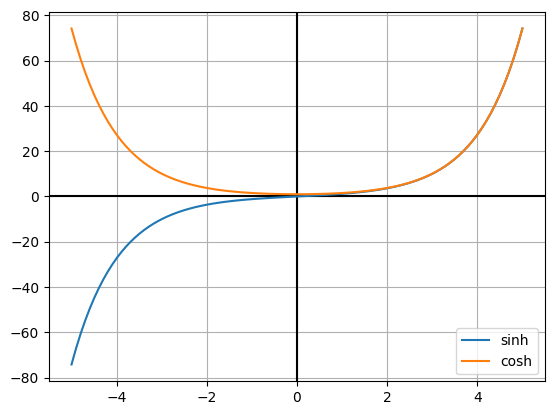

In [21]:
# Create a set of 100 points from -5 to 5
x = np.linspace(-5, 5, 100)

# Define the hyperbolic functions
y = np.sinh(x)
y2 = np.cosh(x)

# Plot the cosh curve
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y, label='sinh');
plt.plot(x, y2, label='cosh');
plt.legend();

We plotted the hyperbolic functions $y = \sinh (x)$ and $y = \cosh (x)$ on the same graph to facilitate a direct comparison of their behaviors.

The graph of $y = \cosh (x)$ is a smooth, symmetric curve with a minimum at $(0, 1)$. It rises steeply in both directions and always remains above the x-axis. Its exponential growth for large $∣x∣$ sets it apart from polynomial curves.

As $x \to \infty$, both $\cosh (x)$ and $\sinh⁡ (x)$ exhibit exponential growth and approach $\frac{e^x}{2}$. However, $\cosh (x)$ is always slightly larger than $\sinh⁡ (x)$ for all finite $x$ due to the presence of the additional $e^{-x}$ term. Also, $\cosh (x)$ is an even function (symmetric about the y-axis), while $\sinh⁡ (x)$ is odd (symmetric about the origin).

#### Hyperbolic Tangent

$$y = \tanh (x) = \frac{\sinh (x)}{\cosh (x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}} \text{ (expressed in terms of exponential functions)}$$

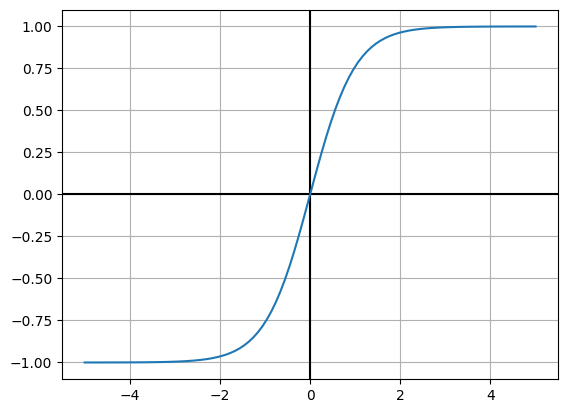

In [22]:
# Create a set of 100 points from -5 to 5
x = np.linspace(-5, 5, 100)

# Define the hyperbolic function
y = np.tanh(x)

# Plot the tanh curve
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid()
plt.plot(x, y);

The hyperbolic tangent function, $y = \tanh (x)$, is widely used in machine learning, particularly as an activation function in neural networks. Its graph forms a smooth *S-shaped* curve, commonly known as a sigmoid, which transitions gradually from $-1$ to $1$ as $x$ increases. This property makes it useful for introducing nonlinearity into models and for mapping inputs to a bounded range.